## Matriculation for different zip codes


In [5]:
import pandas as pd

In [6]:
import os

In [7]:
os.getcwd()

'/srv/data/shared_documents'

In [9]:
college_matriculation= pd.read_csv('./SDP_College_Matriculation_2021-2022.csv')
master_set= pd.read_csv('./2023-2024 Master School List (20231003).csv')

In [10]:
# Merge college_matriculation and master_set on the 'schoolname' column
merged_data = pd.merge(college_matriculation, master_set, on='ULCS Code', how='inner')

# Display the merged DataFrame
merged_data.head()

,School Year,ULCS Code,School Name,Number of Graduates,First-Fall Matriculation Rate,PA Code,NSC Code,NCES Code,AUN Code,SRC School ID,...,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12
0,2021-2022,1010,John Bartram High School,120,25.83,3847.0,393345,4.218990e+11,126515001.0,101,...,0,0,0,0,0,0,1,1,1,1
1,2021-2022,1020,West Philadelphia High School,81,35.80,3860.0,393555,4.218990e+11,126515001.0,102,...,0,0,0,0,0,0,1,1,1,1
2,2021-2022,1030,High School of the Future,133,35.34,7903.0,392779,4.218990e+11,126515001.0,103,...,0,0,0,0,0,0,1,1,1,1
3,2021-2022,1050,Paul Robeson High School for Human Services,79,39.24,7780.0,393347,4.218990e+11,126515001.0,105,...,0,0,0,0,0,0,1,1,1,1
4,2021-2022,1100,William L. Sayre High School,85,23.53,7245.0,393944,4.218990e+11,126515001.0,110,...,0,0,0,0,0,0,1,1,1,1


In [11]:
print(merged_data.columns)


Index(['School Year', 'ULCS Code', 'School Name', 'Number of Graduates',
       'First-Fall Matriculation Rate', 'PA Code', 'NSC Code', 'NCES Code',
       'AUN Code', 'SRC School ID', 'School Name (ULCS)', 'Publication Name',
       'Publication Name Alpha List', 'Abbreviated Name', 'Year Opened',
       'School Level', 'Admission Type', 'Current Grade Span Served',
       'Grade Span at Scale', 'Phasing-In', 'Phasing-Out', 'Governance',
       'Management Organization', 'School Reporting Category',
       'Alternate Education Type', 'Major Intervention',
       'Major Intervention Year', 'Community School Cohort', 'CTE Status',
       'Title I Designation', 'Federal Accountability Designation',
       'City Council District', 'GPS Location', 'Multiple Addresses',
       'Street Address', 'City', 'State', 'Zip Code', 'Phone Number',
       'Fax Number', 'Website', 'School Leader Name', 'Learning Network',
       'Assistant Superintendent', 'FACE Liaison Name', 'FACE Liaison Email',
  

In [12]:
# Select relevant columns
matriculation_data = merged_data[['School Name', 'First-Fall Matriculation Rate', 'Zip Code']]

# Group by 'Zip Code' and calculate the mean matriculation rate
grouped_data = matriculation_data.groupby('Zip Code')['First-Fall Matriculation Rate'].mean().reset_index()

In [13]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:

# Select relevant columns
matriculation_data = merged_data[['School Name', 'First-Fall Matriculation Rate', 'Zip Code']]

# Group by 'Zip Code' and calculate the mean matriculation rate
grouped_data = matriculation_data.groupby(['Zip Code', 'School Name'])['First-Fall Matriculation Rate'].mean().unstack().reset_index()

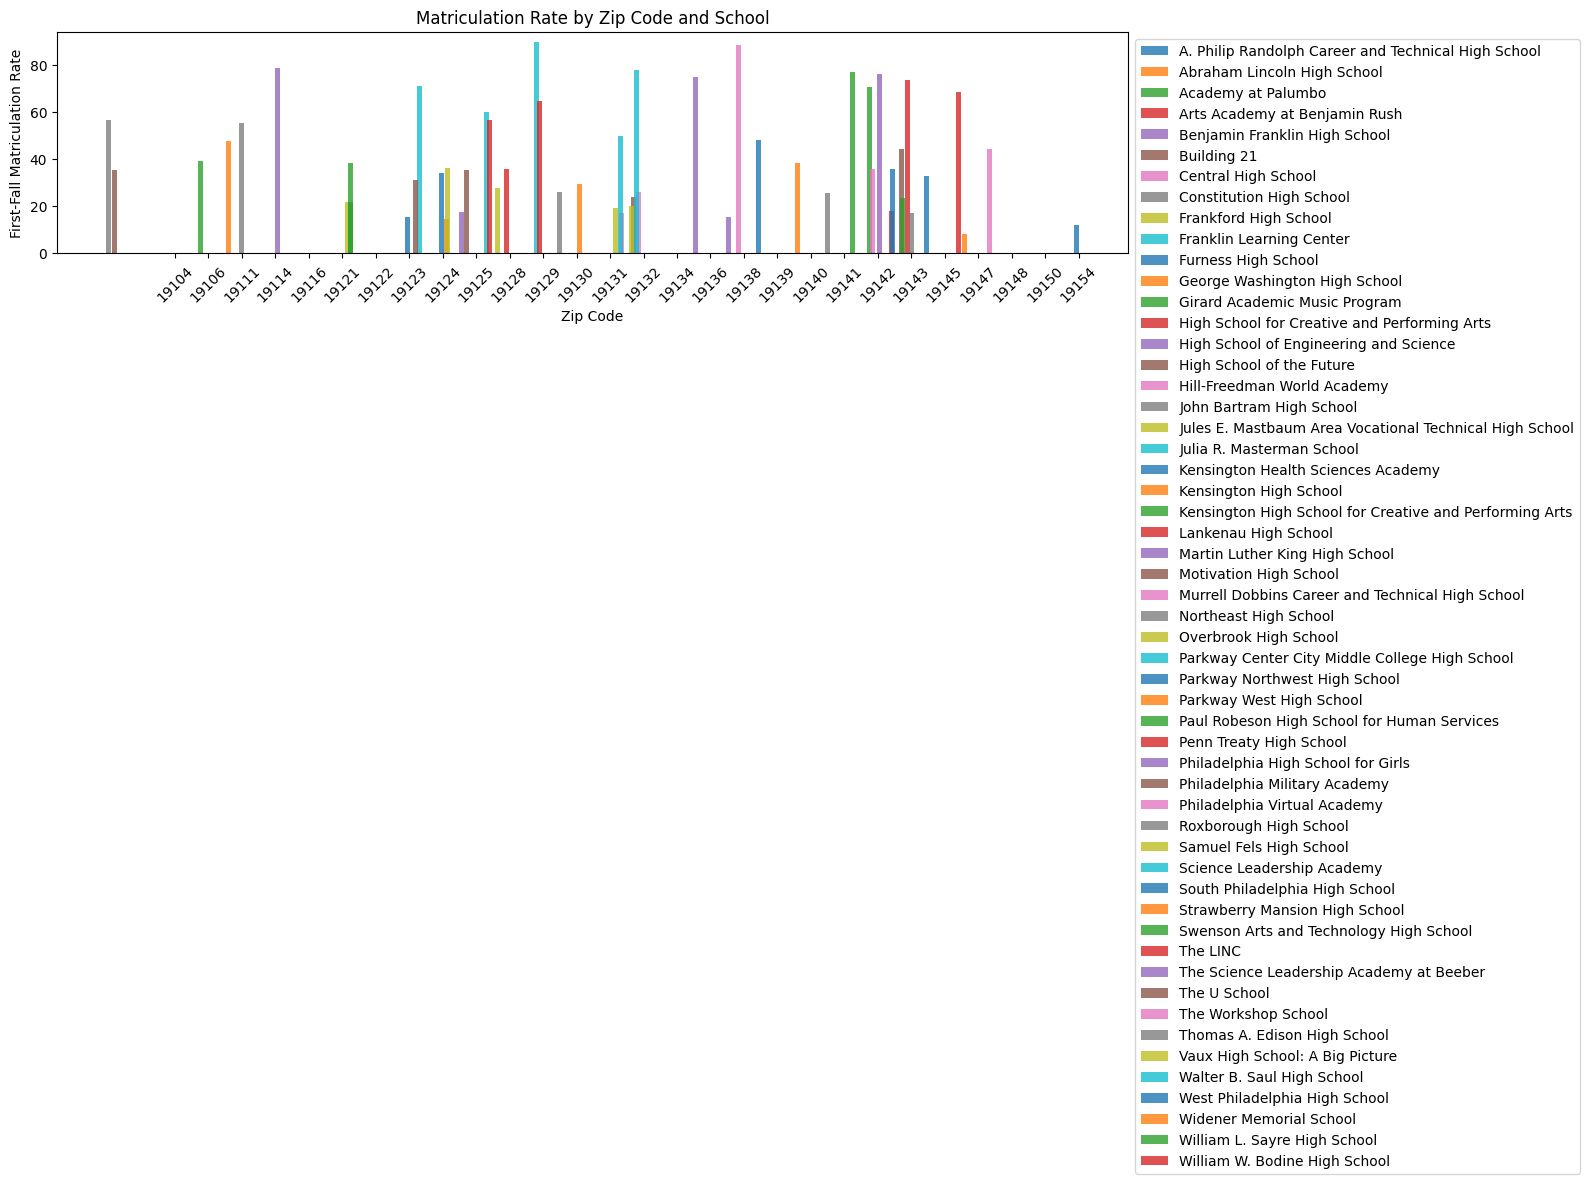

In [16]:
# Set the figure size
plt.figure(figsize=(16, 8))

# Create the grouped bar graph
bar_width = 0.15
index = grouped_data['Zip Code']
labels = grouped_data['Zip Code']
x = range(len(index))

# Plot bars for each school
for i, school in enumerate(grouped_data.columns[1:]):
    plt.bar([p + bar_width * i for p in x], grouped_data[school], width=bar_width, label=school, alpha=0.8)

plt.xlabel('Zip Code')
plt.ylabel('First-Fall Matriculation Rate')
plt.title('Matriculation Rate by Zip Code and School')
plt.xticks([p + 0.5 * bar_width * (len(grouped_data.columns) - 1) for p in x], labels, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show plot
plt.show()

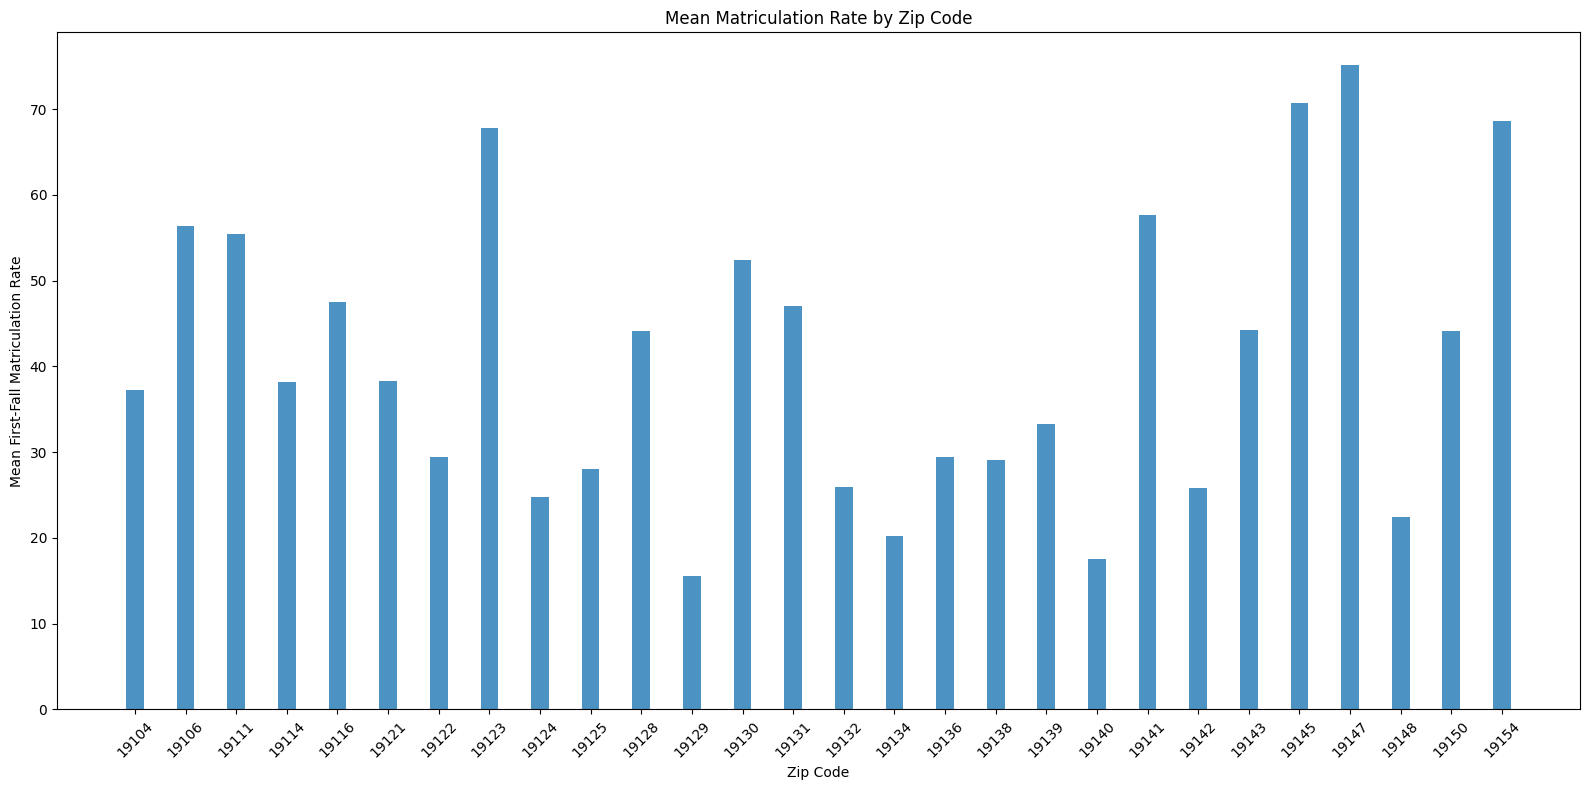

,Zip Code,First-Fall Matriculation Rate
0,19104,37.290000
1,19106,56.410000
2,19111,55.390000
3,19114,38.170000
4,19116,47.550000
5,19121,38.320000
6,19122,29.470000
7,19123,67.860000
8,19124,24.780000
9,19125,28.046667


In [17]:

import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns
matriculation_data = merged_data[['School Name', 'First-Fall Matriculation Rate', 'Zip Code']]

# Group by 'Zip Code' and calculate the mean matriculation rate
grouped_data = matriculation_data.groupby('Zip Code')['First-Fall Matriculation Rate'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the bar graph
bar_width = 0.35
index = range(len(grouped_data))
labels = grouped_data['Zip Code']
x = range(len(index))

# Plot bars for each zip code
plt.bar(x, grouped_data['First-Fall Matriculation Rate'], width=bar_width, alpha=0.8)

plt.xlabel('Zip Code')
plt.ylabel('Mean First-Fall Matriculation Rate')
plt.title('Mean Matriculation Rate by Zip Code')
plt.xticks([p for p in x], labels, rotation=45)
plt.tight_layout()

# Show plot
plt.show()
grouped_data

## IEP graduation rates

In [18]:
grad_rates= pd.read_csv('./SDP_Graduation_Rates_School_S_2023-02-15.csv')
grad_rates


,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score
0,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,All Students,All Students,281,203,72.24
1,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,211,153,72.51
2,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,70,50,71.43
3,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,ELL,EL,37,24,64.86
4,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,ELL,Non-EL,244,179,73.36
...,...,...,...,...,...,...,...,...,...,...
26158,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Ethnicity,White,1,s,s
26159,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Gender,Female,16,s,s
26160,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Gender,Male,5,s,s
26161,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,IEP,Does Not Have IEP,18,s,s


In [19]:
# Filter the DataFrame
filtered_grad_data = grad_rates[(grad_rates['group'] == 'IEP') & 
                            (grad_rates['cohort'] == '2018-2019') ]
                          

# Display the filtered DataFrame
filtered_grad_data.head()

,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score
25137,2018-2019,1010,John Bartram High School,District,4-Year Graduation Rate,IEP,Does Not Have IEP,113,88,77.88
25138,2018-2019,1010,John Bartram High School,District,4-Year Graduation Rate,IEP,Has IEP,44,26,59.09
25150,2018-2019,1020,West Philadelphia High School,District,4-Year Graduation Rate,IEP,Does Not Have IEP,69,54,78.26
25151,2018-2019,1020,West Philadelphia High School,District,4-Year Graduation Rate,IEP,Has IEP,33,17,51.52
25164,2018-2019,1030,High School of the Future,District,4-Year Graduation Rate,IEP,Does Not Have IEP,107,98,91.59


In [20]:
filtered_grad_data

,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score
25137,2018-2019,1010,John Bartram High School,District,4-Year Graduation Rate,IEP,Does Not Have IEP,113,88,77.88
25138,2018-2019,1010,John Bartram High School,District,4-Year Graduation Rate,IEP,Has IEP,44,26,59.09
25150,2018-2019,1020,West Philadelphia High School,District,4-Year Graduation Rate,IEP,Does Not Have IEP,69,54,78.26
25151,2018-2019,1020,West Philadelphia High School,District,4-Year Graduation Rate,IEP,Has IEP,33,17,51.52
25164,2018-2019,1030,High School of the Future,District,4-Year Graduation Rate,IEP,Does Not Have IEP,107,98,91.59
...,...,...,...,...,...,...,...,...,...,...
26139,2018-2019,8870,One Bright Ray Mansion Evening,Alternative,4-Year Graduation Rate,IEP,Has IEP,1,s,s
26150,2018-2019,8890,One Bright Ray - Simpson Campus,Alternative,4-Year Graduation Rate,IEP,Does Not Have IEP,93,s,s
26151,2018-2019,8890,One Bright Ray - Simpson Campus,Alternative,4-Year Graduation Rate,IEP,Has IEP,8,s,s
26161,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,IEP,Does Not Have IEP,18,s,s


In [21]:
# Merge filtered_data and master_set on the different 'ULCS Code' columns
merged_filtered_data = pd.merge(filtered_grad_data, master_set, left_on='schoolid_ulcs', right_on='ULCS Code', how='inner')

# Display the merged DataFrame
merged_filtered_data.head()

,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score,...,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12
0,2018-2019,1010,John Bartram High School,District,4-Year Graduation Rate,IEP,Does Not Have IEP,113,88,77.88,...,0,0,0,0,0,0,1,1,1,1
1,2018-2019,1010,John Bartram High School,District,4-Year Graduation Rate,IEP,Has IEP,44,26,59.09,...,0,0,0,0,0,0,1,1,1,1
2,2018-2019,1020,West Philadelphia High School,District,4-Year Graduation Rate,IEP,Does Not Have IEP,69,54,78.26,...,0,0,0,0,0,0,1,1,1,1
3,2018-2019,1020,West Philadelphia High School,District,4-Year Graduation Rate,IEP,Has IEP,33,17,51.52,...,0,0,0,0,0,0,1,1,1,1
4,2018-2019,1030,High School of the Future,District,4-Year Graduation Rate,IEP,Does Not Have IEP,107,98,91.59,...,0,0,0,0,0,0,1,1,1,1


In [22]:
print(merged_filtered_data.columns)

Index(['cohort', 'schoolid_ulcs', 'schoolname', 'sector', 'rate_type', 'group',
       'subgroup', 'denom', 'num', 'score', 'PA Code', 'NSC Code', 'NCES Code',
       'AUN Code', 'ULCS Code', 'SRC School ID', 'School Name (ULCS)',
       'Publication Name', 'Publication Name Alpha List', 'Abbreviated Name',
       'Year Opened', 'School Level', 'Admission Type',
       'Current Grade Span Served', 'Grade Span at Scale', 'Phasing-In',
       'Phasing-Out', 'Governance', 'Management Organization',
       'School Reporting Category', 'Alternate Education Type',
       'Major Intervention', 'Major Intervention Year',
       'Community School Cohort', 'CTE Status', 'Title I Designation',
       'Federal Accountability Designation', 'City Council District',
       'GPS Location', 'Multiple Addresses', 'Street Address', 'City', 'State',
       'Zip Code', 'Phone Number', 'Fax Number', 'Website',
       'School Leader Name', 'Learning Network', 'Assistant Superintendent',
       'FACE Liaison 

In [23]:
# Create a new DataFrame with only 'Zip Code' and 'score' columns
score_zip_data = merged_filtered_data[['Zip Code', 'score']]

# Display the new DataFrame
score_zip_data

,Zip Code,score
0,19142,77.88
1,19142,59.09
2,19139,78.26
3,19139,51.52
4,19104,91.59
...,...,...
150,19121,s
151,19124,s
152,19124,s
153,19124,s


In [24]:
# Convert 'score' column to numeric
score_zip_data.loc[:, 'score'] = pd.to_numeric(score_zip_data['score'], errors='coerce')

# Calculate the average score for each zip code
avg_score_zip_data = score_zip_data.groupby('Zip Code')['score'].mean().reset_index()

# Display the new DataFrame with average score for each zip code
avg_score_zip_data


,Zip Code,score
0,19104,88.1875
1,19106,NaN
2,19111,73.525
3,19114,93.315
4,19116,63.4
5,19120,NaN
6,19121,31.36
7,19122,70.0575
8,19123,21.97
9,19124,41.506667


## ADA by zipcode

In [25]:
ada = pd.read_csv('/srv/data/shared_documents/Student_ADA_Yearly_Zipcode-2.csv', delimiter=';', on_bad_lines = 'warn')

In [26]:
ada['Average Daily Attendance (YTD)'] = ada['Average Daily Attendance (YTD)'].str.replace(',', '.').astype(float)

In [27]:
filtered_ada = ada[ada['School Year'] == '2022-2023']
filtered_ada.head()

,School Year,Sector,ULCS Code,School Name,Average Daily Attendance (YTD),Zip Code
1,2022-2023,District,5020,Thomas A. Edison High School,72.64,19140.0
11,2022-2023,District,4140,Strawberry Mansion High School,75.02,19121.0
14,2022-2023,District,5700,Kensington High School,75.40,19125.0
15,2022-2023,District,4020,Overbrook High School,76.18,19131.0
16,2022-2023,District,5520,Kensington High School for Creative and Perfor...,76.32,19122.0


In [28]:
average_by_zipcode = ada.groupby('Zip Code')['Average Daily Attendance (YTD)'].mean()
print(average_by_zipcode)

Zip Code
19103.0    95.230000
19104.0    90.681429
19106.0    91.840000
19111.0    90.561667
19114.0    91.030000
19115.0    94.153333
19116.0    91.850000
19118.0    91.960000
19119.0    91.943333
19120.0    89.926364
19121.0    84.866000
19122.0    84.828571
19123.0    90.830000
19124.0    85.882500
19125.0    86.417143
19126.0    89.100000
19127.0    92.670000
19128.0    89.481667
19129.0    85.885000
19130.0    89.196667
19131.0    86.122000
19132.0    83.658000
19133.0    86.525000
19134.0    86.896250
19135.0    88.850000
19136.0    87.900000
19137.0    89.750000
19138.0    88.404000
19139.0    86.703000
19140.0    85.455455
19141.0    90.887143
19142.0    87.708000
19143.0    86.330000
19144.0    87.487500
19145.0    88.732500
19146.0    90.990000
19147.0    94.172857
19148.0    89.253750
19149.0    90.628000
19150.0    90.923333
19151.0    88.745000
19152.0    90.527500
19153.0    86.070000
19154.0    91.413333
Name: Average Daily Attendance (YTD), dtype: float64


In [29]:
merged_data = pd.merge(average_by_zipcode, avg_score_zip_data, on='Zip Code', how='inner')
print(merged_data)

    Zip Code  Average Daily Attendance (YTD)      score
0    19104.0                       90.681429    88.1875
1    19106.0                       91.840000        NaN
2    19111.0                       90.561667     73.525
3    19114.0                       91.030000     93.315
4    19116.0                       91.850000       63.4
5    19120.0                       89.926364        NaN
6    19121.0                       84.866000      31.36
7    19122.0                       84.828571    70.0575
8    19123.0                       90.830000      21.97
9    19124.0                       85.882500  41.506667
10   19125.0                       86.417143  66.788333
11   19128.0                       89.481667    80.3775
12   19129.0                       85.885000     84.735
13   19130.0                       89.196667     50.735
14   19131.0                       86.122000      70.14
15   19132.0                       83.658000      40.72
16   19133.0                       86.525000    

In [30]:
climate_df = pd.read_csv('/srv/data/shared_documents/SPREE_SY2122_School_Metric_Scores_Student_Climate_Rating-2.csv', delimiter=';', on_bad_lines = 'warn')

In [31]:
import numpy as np

In [32]:
filtered_df = climate_df[climate_df['metric'].str.contains('Student Climate Rating', na=False)]
filtered_df.loc[filtered_df['metric_score'] == 'Insufficient Sample', 'metric_score'] = np.nan

filtered_df.loc[filtered_df['metric_score'] == 'Ineligible by Grades Served', 'metric_score'] = np.nan

filtered_df['metric_score'] = filtered_df['metric_score'].astype(str).str.replace(',', '.').astype(float)
average_metric_score = filtered_df.groupby('Zip Code')['metric_score'].mean()



/tmp/ipykernel_35663/727241292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['metric_score'] = filtered_df['metric_score'].astype(str).str.replace(',', '.').astype(float)


In [33]:
merged_data = pd.merge(merged_data, average_metric_score, on='Zip Code', how='inner')
print(merged_data)

    Zip Code  Average Daily Attendance (YTD)      score  metric_score
0    19104.0                       90.681429    88.1875      6.840000
1    19106.0                       91.840000        NaN      6.800000
2    19111.0                       90.561667     73.525      6.700000
3    19114.0                       91.030000     93.315      7.300000
4    19116.0                       91.850000       63.4      7.357143
5    19120.0                       89.926364        NaN      6.172727
6    19121.0                       84.866000      31.36      6.400000
7    19122.0                       84.828571    70.0575      6.450000
8    19123.0                       90.830000      21.97      7.000000
9    19124.0                       85.882500  41.506667      6.245455
10   19125.0                       86.417143  66.788333      6.744444
11   19128.0                       89.481667    80.3775      7.016667
12   19129.0                       85.885000     84.735      6.900000
13   19130.0        

In [34]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [35]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [36]:
merged_data

,Zip Code,Average Daily Attendance (YTD),score,metric_score
0,19104.0,90.681429,88.1875,6.840000
1,19106.0,91.840000,NaN,6.800000
2,19111.0,90.561667,73.525,6.700000
3,19114.0,91.030000,93.315,7.300000
4,19116.0,91.850000,63.4,7.357143
5,19120.0,89.926364,NaN,6.172727
6,19121.0,84.866000,31.36,6.400000
7,19122.0,84.828571,70.0575,6.450000
8,19123.0,90.830000,21.97,7.000000
9,19124.0,85.882500,41.506667,6.245455


In [39]:
merged_data = merged_data.dropna()

merged_data.rename(columns={'score': 'IEP Score'}, inplace=True)

merged_data

,Zip Code,Average Daily Attendance (YTD),IEP Score,metric_score
0,19104.0,90.681429,88.1875,6.840000
2,19111.0,90.561667,73.525,6.700000
3,19114.0,91.030000,93.315,7.300000
4,19116.0,91.850000,63.4,7.357143
6,19121.0,84.866000,31.36,6.400000
7,19122.0,84.828571,70.0575,6.450000
8,19123.0,90.830000,21.97,7.000000
9,19124.0,85.882500,41.506667,6.245455
10,19125.0,86.417143,66.788333,6.744444
11,19128.0,89.481667,80.3775,7.016667


In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

merged_data['metric_score'] = le.fit_transform(merged_data['metric_score'])
merged_data['IEP Score'] = le.fit_transform(merged_data['IEP Score'])
merged_data['Average Daily Attendance (YTD)'] = le.fit_transform(merged_data['Average Daily Attendance (YTD)'])

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data.select_dtypes(include=[np.number]))

In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(scaled_features)

merged_data['cluster'] = kmeans.labels_

In [44]:
print(kmeans.cluster_centers_)

print(merged_data.groupby('cluster').mean())

[[ 0.87106685  0.24848485  0.35757576 -0.24848485]
 [-0.9212002   0.52592593  0.22962963  1.02962963]
 [-0.2151556  -1.24444444 -1.         -1.08888889]]
             Zip Code  Average Daily Attendance (YTD)  IEP Score  metric_score
cluster                                                                       
0        19142.000000                       14.363636  15.181818     10.636364
1        19120.000000                       16.444444  14.222222     20.222222
2        19128.666667                        3.166667   5.000000      4.333333


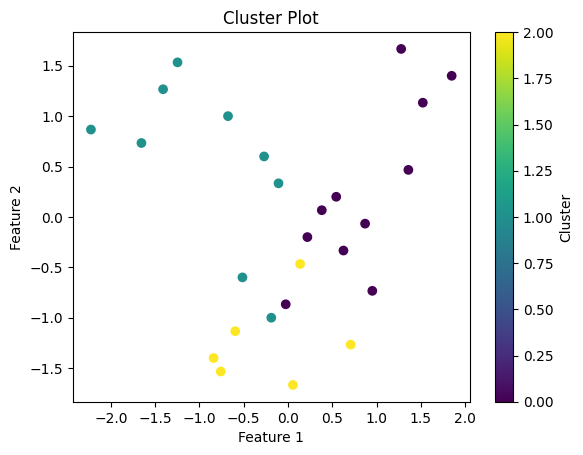

In [46]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=merged_data['cluster'], cmap='viridis')
plt.title('Cluster Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()